In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

from api_key_container import api_key

In [3]:
url = "https://api.marketstack.com/v1/tickers?access_key=" + api_key
response = requests.get(url)
response_json = response.json()
companies = response_json['data']
companies_df = pd.json_normalize(companies, meta=['name'])
companies_df

,name,symbol,has_intraday,has_eod,country,stock_exchange.name,stock_exchange.acronym,stock_exchange.mic,stock_exchange.country,stock_exchange.country_code,stock_exchange.city,stock_exchange.website
0,Microsoft Corporation,MSFT,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
1,Apple Inc,AAPL,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
2,Amazon.com Inc,AMZN,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
3,Alphabet Inc - Class C,GOOG,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
4,Alphabet Inc - Class A,GOOGL,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mondelez International Inc - Class A,MDLZ,False,True,None,NASDAQ - ALL MARKETS,NASDAQ,XNAS,None,US,NEW YORK,www.nasdaq.com
96,United Parcel Service Inc - Class B,UPS,False,True,None,"NEW YORK STOCK EXCHANGE, INC.",NYSE,XNYS,None,US,NEW YORK,www.nyse.com
97,Deutsche Telekom AG,DTEGY,False,True,None,OTC LINK ATS - OTC MARKETS,,OTCM,None,US,NEW YORK,www.otcmarkets.com
98,Sony Corporation.,SNE,False,True,None,"NEW YORK STOCK EXCHANGE, INC.",NYSE,XNYS,None,US,NEW YORK,www.nyse.com


In [8]:
url = "https://api.marketstack.com/v1/eod?access_key=" + api_key

In [9]:
def get_company_data(symbol):
    querystring = {"symbols":symbol,"date_from":"2023-11-01", "date_to":"2024-12-01"}
    response = requests.get(url, params=querystring)
    data = response.json()['data']
    df = pd.json_normalize(data, meta=['date'])
    return df

In [11]:
meta_df = get_company_data("META")
google_df_1 = get_company_data("GOOG")
google_df_2 = get_company_data("GOOGL")
apple_df = get_company_data("AAPL")
amazon_df = get_company_data("AMZN")
microsoft_df = get_company_data("MSFT")

In [12]:
meta_df.head(5)

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange,date
0,569.00,578.4600,566.9000,574.32,7130519.0,578.4600,566.9000,574.32,569.00,7130519.0,1.0,0.0,META,ARCX,2024-11-29T00:00:00+0000
1,574.89,574.9800,564.1001,569.20,7200228.0,574.9800,564.1001,569.20,574.89,7200228.0,1.0,0.0,META,ARCX,2024-11-27T00:00:00+0000
2,566.00,577.5000,565.2000,573.54,10356550.0,577.5000,565.2000,573.54,566.00,10356550.0,1.0,0.0,META,ARCX,2024-11-26T00:00:00+0000
3,562.10,572.5915,556.3900,565.11,13599830.0,572.5915,556.3900,565.11,562.10,13599830.0,1.0,0.0,META,ARCX,2024-11-25T00:00:00+0000
4,563.55,563.8273,554.5900,559.14,9164004.0,563.8273,554.5900,559.14,563.55,9164004.0,1.0,0.0,META,ARCX,2024-11-22T00:00:00+0000


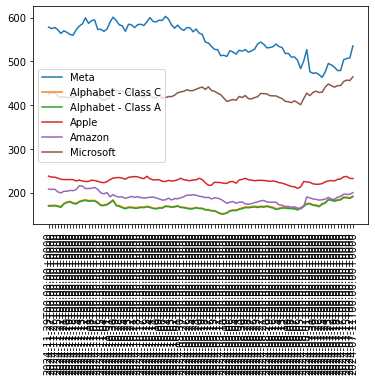

In [20]:
plt.plot(meta_df['date'], meta_df['high'], label='Meta')
plt.plot(google_df_1['date'], google_df_1['high'], label='Alphabet - Class C')
plt.plot(google_df_2['date'], google_df_2['high'], label='Alphabet - Class A')
plt.plot(apple_df['date'], apple_df['high'], label='Apple')
plt.plot(amazon_df['date'], amazon_df['high'], label='Amazon')
plt.plot(microsoft_df['date'], microsoft_df['high'], label='Microsoft')
plt.xticks(rotation=90)
plt.legend()
plt.show()